In [73]:
#import libraries
import pandas as pd
import numpy as np


In [74]:
#load the data
df=pd.read_csv('googleplaystore.csv')

In [75]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [77]:
#check null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [78]:
#drop null values
df=df.dropna()

In [79]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [80]:
df.shape

(9360, 13)

In [81]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [82]:
#data cleaning
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('M', ''))*1000 if 'M' in str(x) else x) 

df['Size'] = df['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0.0') if 'Varies with device' in str(x) else x) 

In [83]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', ''))if 'k' in str(x) else float(x))

In [84]:
df['Size'].value_counts()

0.0        1637
14000.0     165
12000.0     161
15000.0     159
11000.0     159
           ... 
812.0         1
837.0         1
930.0         1
506.0         1
143.0         1
Name: Size, Length: 412, dtype: int64

In [85]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('nan', '0.0') if 'nan' in str(x) else float(x))

In [86]:
df['Size'].value_counts()

0.0        1637
14000.0     165
12000.0     161
15000.0     159
11000.0     159
           ... 
812.0         1
837.0         1
930.0         1
506.0         1
143.0         1
Name: Size, Length: 412, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null float64
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [88]:
df["Size "] = df["Size"].astype(float)
df["Reviews"] = df["Reviews"].astype(float)

In [89]:
df["Installs"]=df["Installs"].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else float(x))
df["Installs"]=df["Installs"].apply(lambda x: float(str(x).replace(',', '')) if ',' in str(x) else float(x))

In [90]:
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01,
       5.e+00, 5.e+01, 1.e+00])

In [91]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [92]:
df["Price"]=df["Price"].apply(lambda x: float(str(x).replace('$', '')) if '$' in str(x) else float(x))

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null float64
Size              9360 non-null float64
Installs          9360 non-null float64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Size              9360 non-null float64
dtypes: float64(6), object(8)
memory usage: 1.1+ MB


In [94]:
df.drop(df[(df['Reviews'] < 1) & (df['Reviews'] > 5 )].index, inplace = True)

In [95]:
df.drop(df[df['Installs'] < df['Reviews'] ].index, inplace = True)

In [96]:
df.drop(df[(df['Type'] =='Free') & (df['Price'] > 0 )].index, inplace = True)

In [97]:
import seaborn as sns

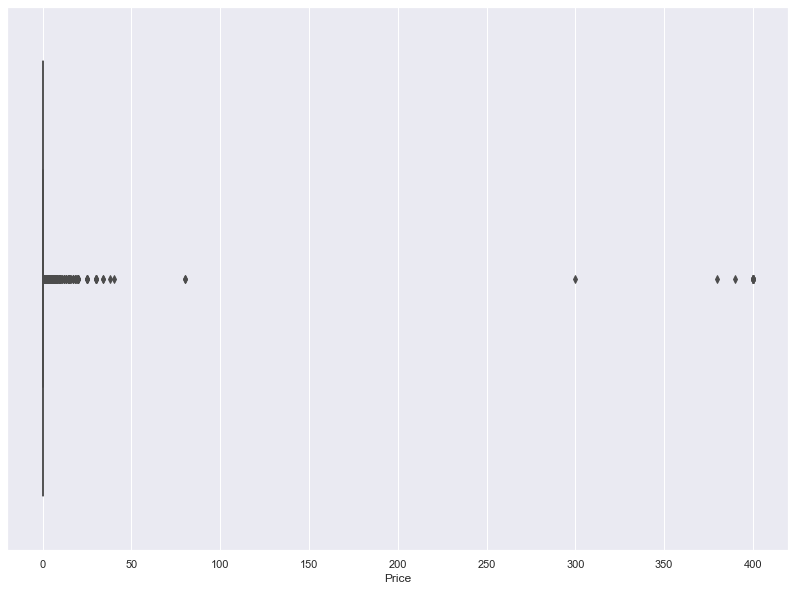

In [98]:
sns.boxplot(df['Price'])

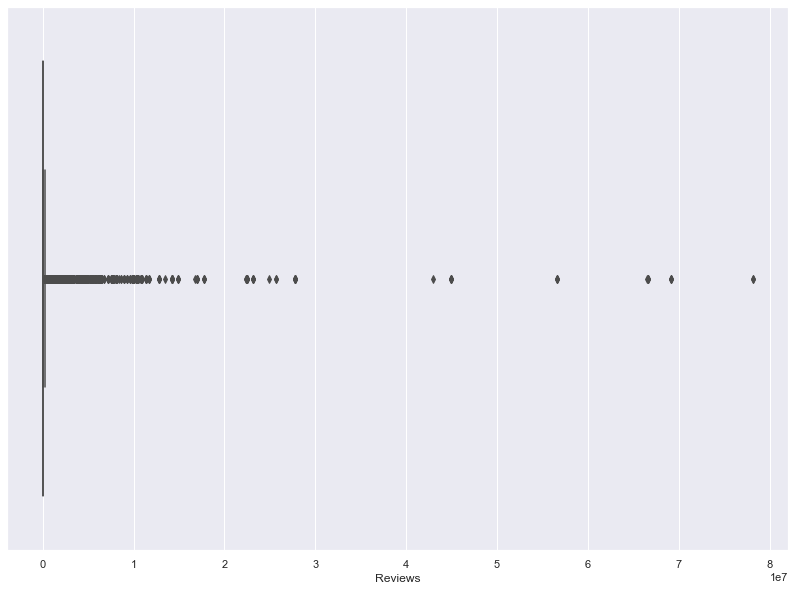

In [99]:
sns.boxplot(df['Reviews'])

In [100]:
from matplotlib import pyplot as plt
import numpy as np 

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

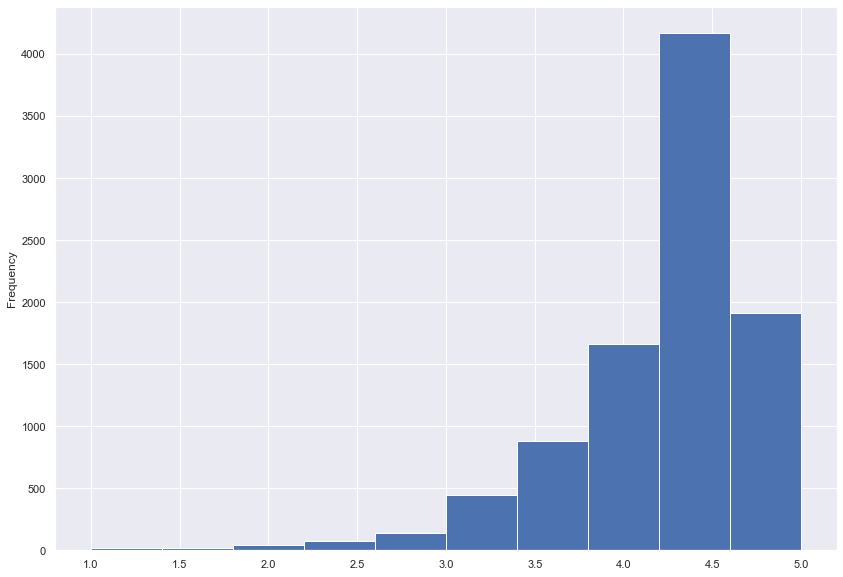

In [101]:
df.Rating.plot(kind='hist',label='Rating')

plt.xlabel

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

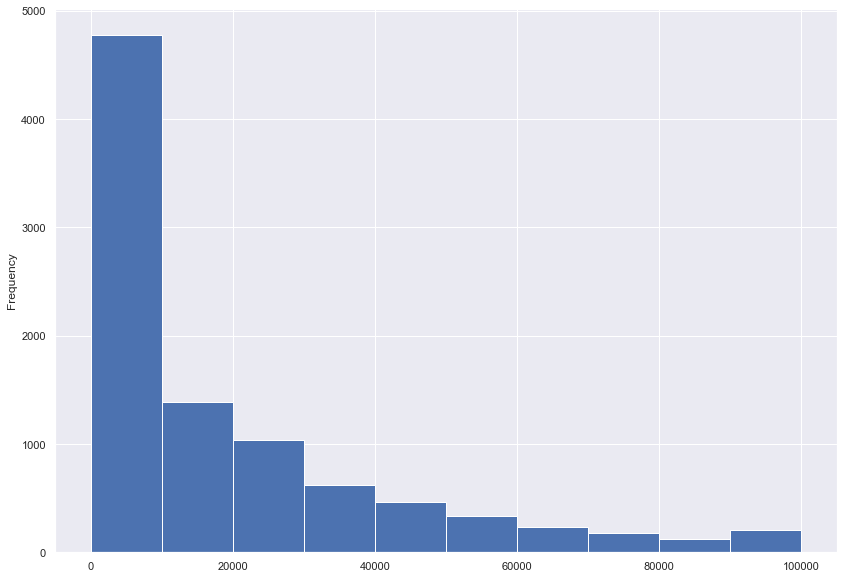

In [102]:
df.Size.plot(kind='hist')

plt.xlabel

In [103]:
#OUTLIER TREATMENT
#Drop apps above price of $200
df.drop(df[df['Price'] >200].index, inplace = True)

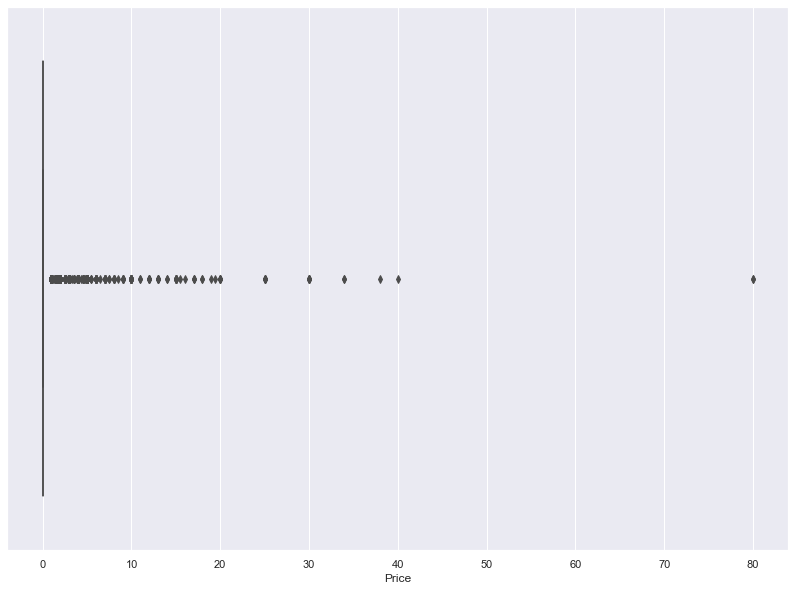

In [104]:
sns.boxplot(df['Price'])

In [105]:
#Drop records having more than 2 million reviews
df.drop(df[df['Reviews'] >200000].index, inplace = True)

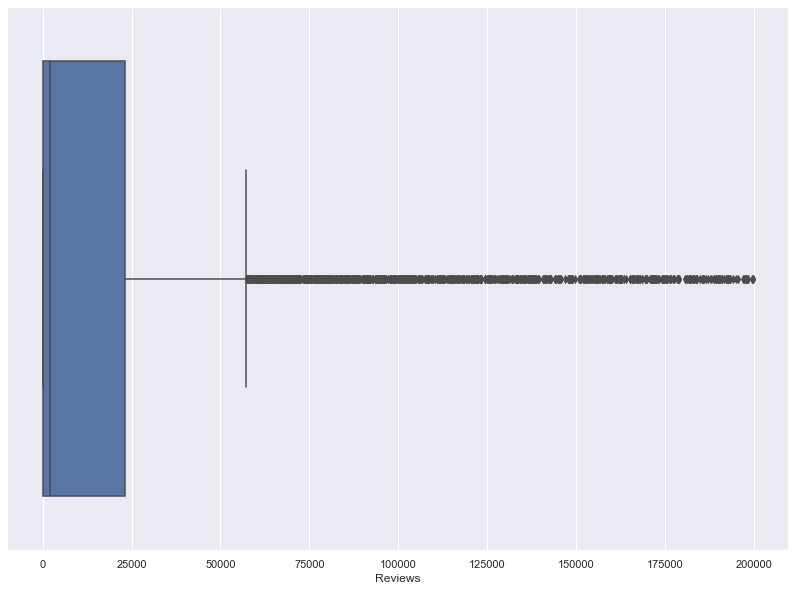

In [106]:
sns.boxplot(df['Reviews'])

In [107]:
#Drop apps having high number of installs,check percentiles
df.quantile([.1, .25, .5, .70, .90, .95, .99], axis = 0) 

,Rating,Reviews,Size,Installs,Price,Size
0.10,3.5,14.00,0.0,1000.0,0.00,0.0
0.25,3.9,100.00,3100.0,10000.0,0.00,3100.0
0.50,4.2,1915.00,9550.0,100000.0,0.00,9550.0
0.70,4.4,14954.10,22000.0,1000000.0,0.00,22000.0
0.90,4.7,74839.70,48000.0,5000000.0,0.00,48000.0
0.95,4.8,121568.55,64000.0,10000000.0,2.99,64000.0
0.99,5.0,177288.11,95000.0,10000000.0,8.99,95000.0


In [108]:
df.drop(df[df['Installs'] >1000000].index, inplace = True)

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

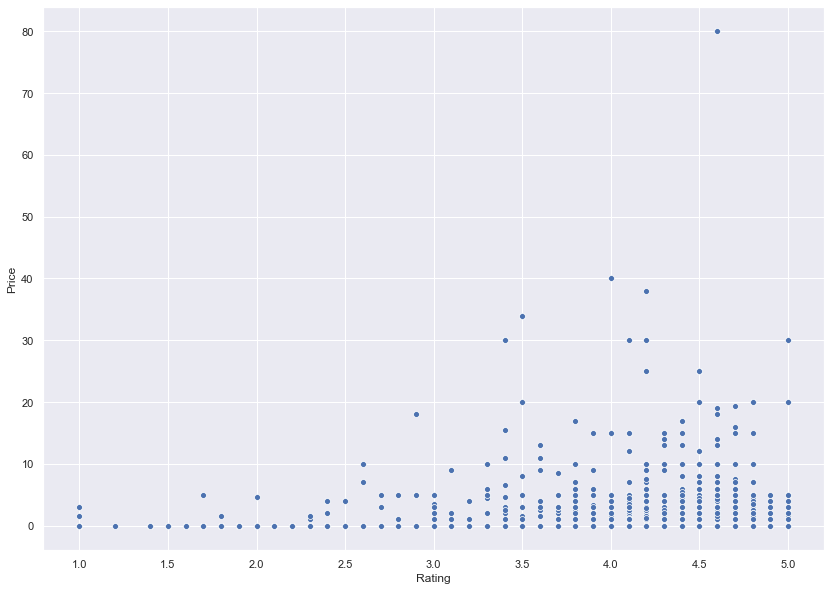

In [110]:
#Bivariate analysis
sns.scatterplot(x='Rating',y='Price',data=df)

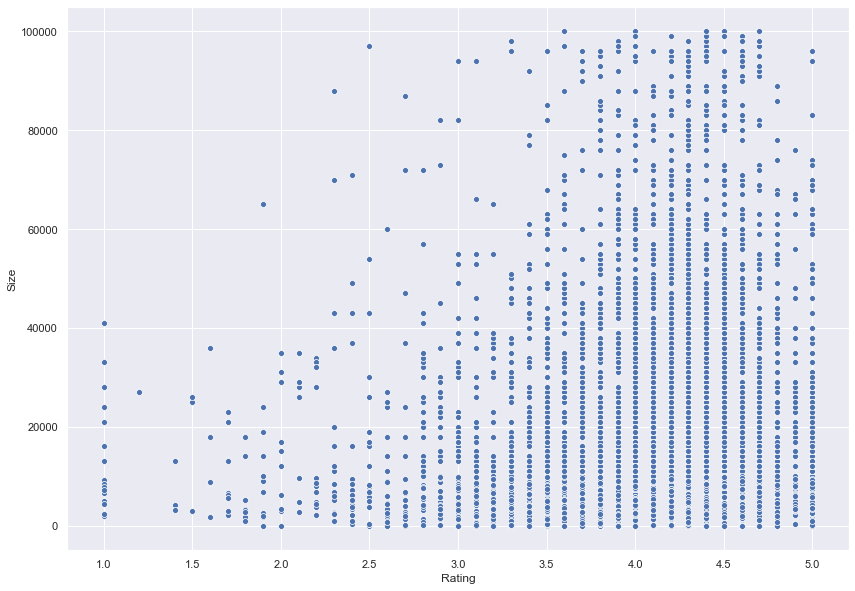

In [111]:
sns.scatterplot(x='Rating',y='Size',data=df)

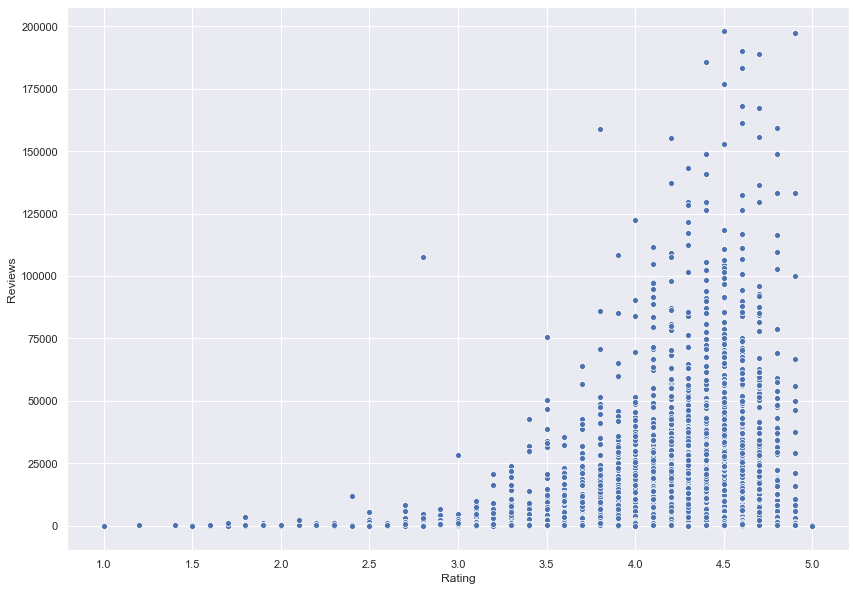

In [112]:
sns.scatterplot(x='Rating',y='Reviews',data=df)

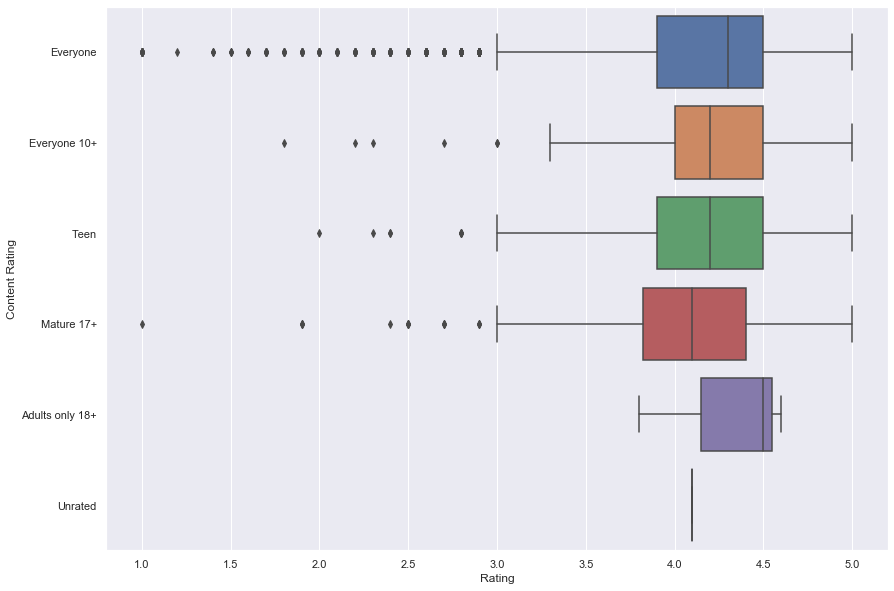

In [113]:
sns.boxplot(x="Rating", y="Content Rating", data=df)

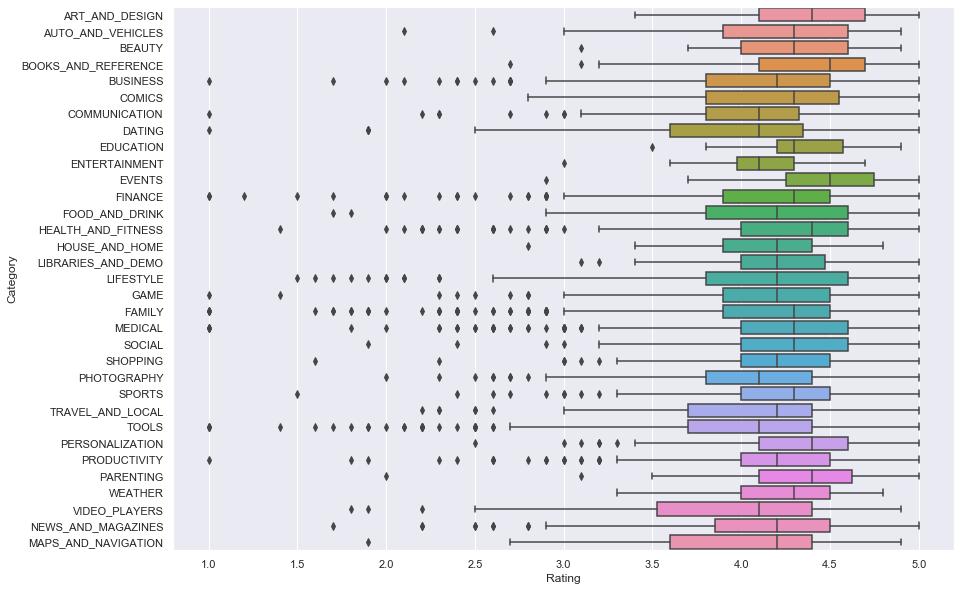

In [114]:
sns.set(rc={'figure.figsize':(14,10)})
sns.boxplot(x="Rating", y="Category", data=df)

In [115]:
#Data preprocessing
inp1=df

In [116]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5600.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19000.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19000.0


In [117]:
#Reduce the skew in Reviews
inp1.skew()

Rating      -1.566536
Reviews      3.911745
Size         1.770734
Installs     0.953499
Price       14.282934
Size         1.770734
dtype: float64

In [118]:
rev_skew=np.log1p(inp1['Reviews'])
inp1['Reviews'] = rev_skew

In [119]:
 rev_skew.skew()

-0.13129253907545763

In [120]:
#Reduce the skew in Installs
Inst_skew=np.log1p(inp1['Installs'])
inp1['Installs'] = Inst_skew

In [121]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5600.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.187386,19000.0,10.819798,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19000.0


In [122]:
#DROP COLUMNS
inp1.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1,inplace=True)

In [123]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Size
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design,19000.0
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play,14000.0
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity,2800.0
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design,5600.0
6,ART_AND_DESIGN,3.8,5.187386,19000.0,10.819798,0.0,Everyone,Art & Design,19000.0


In [124]:
#DUMMY ENCODING TO CONVERT CHARACTER FIELDS TO NUMERIC
inp2= pd.get_dummies(inp1[['Category','Genres','Content Rating']], drop_first=True)

In [125]:
inp2.head()

,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [126]:
inp1.drop(['Category','Content Rating','Genres'],axis=1,inplace=True)

In [127]:
inp1.head()

,Rating,Reviews,Size,Installs,Price,Size
0,4.1,5.075174,19000.0,9.210440,0.0,19000.0
1,3.9,6.875232,14000.0,13.122365,0.0,14000.0
4,4.3,6.875232,2800.0,11.512935,0.0,2800.0
5,4.4,5.123964,5600.0,10.819798,0.0,5600.0
6,3.8,5.187386,19000.0,10.819798,0.0,19000.0


In [128]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

import statsmodels.formula.api as smf 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer ,IterativeImputer

In [129]:
inp2 = pd.concat([inp1,inp2], axis=1)

In [130]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Size,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,19000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,14000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,2800.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,5600.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000.0,10.819798,0.0,19000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [131]:
X= inp2.drop('Rating', axis =1 )
y= inp2.Rating

In [132]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [133]:
X_test.shape

(1949, 149)

In [134]:
#MODEL BUILDING
m=LR().fit(X_train,y_train)

In [135]:
#predictions on the test set
pred=m.predict(X_test)

In [136]:
pred[0:10]

array([3.97652536, 4.11938606, 4.31440012, 3.88883881, 4.15195112,
       3.98515471, 4.03426084, 4.24173988, 4.12817451, 4.28083411])

In [137]:
#report R2 on train set
reg_all = LR()
reg_all.fit(X_train,y_train)
R2_train = round(reg_all.score(X_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.146


In [138]:
R2_test = round(reg_all.score(X_test,y_test),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.113


In [139]:
np.mean((pred- y_test)**2)  #RMSE 

0.2795096684198916

In [140]:
m.score(X_test, y_test)

0.11290302002748542